In [1]:
pip install noisereduce


In [2]:
pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 36.2 MB/s eta 0:00:00


In [3]:
!pip install --upgrade librosa

In [4]:
pip install librosa scipy

In [5]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [6]:
pip install pysptk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pysptk: filename=pysptk-1.0.1-cp310-cp310-linux_x86_64.whl size=1241372 sha256=9bd09854bd5bd117a70920b372c20ee41ee5fab194400ba7ca424b7819aaf39e
  Stored in directory: /root/.cache/pip/wheels/ba/c2/7f/73c54e1795eeca8f995f95474c8290b78ee0a6306412dc934f
Successfully built pysptk


In [7]:
import pandas as pd
import numpy as np
import librosa
import parselmouth
from parselmouth.praat import call
import scipy.stats as stats

In [8]:
import scipy
from scipy.signal import lfilter, hamming
import pysptk
from scipy.io import wavfile
from tqdm import tqdm

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os

Mounted at /content/drive


In [11]:
!pip install -U path.py
import os
from path import Path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load File

In [12]:
#df = pd.read_csv("IEMOCAP_Final.csv")
path = Path("/content/drive/MyDrive/CS 297/IEMOCAP/IEMOCAP_Final.csv")
df = pd.read_csv(path)
df

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,Arousal,Valence,Dominance,dimension,category,act,val,dom
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[4, 2]","[3, 3]","[4, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4"
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[4, 1]","[4, 4]","[3, 4]","[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4"
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,"[4, 2]","[3, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4"
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[3, 1]","[3, 4]","[3, 4]","[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4"
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,"[4, 2]","[4, 3]","[3, 4]","[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_F024,Do you still feel like that?,404.1923-406.6600,Sadness,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Neutral state', 'Sadness', 'Neutral state']",Neutral state,"[3, 4]","[3, 3]","[2, 3]","[{'arousal': 2.5, 'valence': 3.0, 'dominance':...","['Sadness', 'Neutral', 'Neutral']","2,3","3,3","3,2"
10033,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_M039,"I I want you now, Annie.",407.9600-410.7823,Excited,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Excited', 'Sadness']",Excited,"[2, 2]","[3, 3]","[4, 3]","[{'arousal': 4.0, 'valence': 3.0, 'dominance':...","['Excited', 'Sadness', 'Excited']","4,4","3,3","3,4"
10034,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_F025,Because you can't feel like that anymore Chris...,410.4317-427.7079,Sadness,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Other', 'Sadness', 'Sadness']",Sadness,"[2, 3]","[4, 3]","[5, 4]","[{'arousal': 3.5, 'valence': 2.5, 'dominance':...","['Sadness', 'Sadness', 'Other']","3,4","3,2","4,5"
10035,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_M040,"Oh Annie. Annie, I am going to make you a for...",426.7965-431.8242,Excited,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Happiness', 'Excited', 'Happiness']",Happiness,"[1, 2]","[2, 2]","[5, 4]","[{'arousal': 4.5, 'valence': 4.0, 'dominance':...","['Excited', 'Happiness', 'Happiness']","4,5","4,4","4,5"


In [ ]:
df['Audio_Uttrance_Path'] = df['Audio_Uttrance_Path'].str.replace('/content/drive/Shareddrives/CS298/', '/content/drive/MyDrive/')

In [ ]:
df.drop(columns=['Arousal', 'Valence', 'Dominance'], inplace=True)

In [ ]:
df

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path,Major_Emotion,Major,dimension,category,act,val,dom
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,4","3,3","4,4"
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[{'arousal': 3.5, 'valence': 2.0, 'dominance':...","['Frustration', 'Fear', 'Excited']","2,5","2,2","3,4"
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,"[{'arousal': 3.0, 'valence': 3.0, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","3,3","3,4"
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Frustration']",Fear,"[{'arousal': 4.0, 'valence': 2.5, 'dominance':...","['Frustration', 'Fear', 'Excited']","3,5","3,2","3,4"
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Excited', 'Fear']",Fear,"[{'arousal': 3.0, 'valence': 2.5, 'dominance':...","['Fear', 'Fear', 'Excited']","2,4","2,3","3,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_F024,Do you still feel like that?,404.1923-406.6600,Sadness,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Neutral state', 'Sadness', 'Neutral state']",Neutral state,"[{'arousal': 2.5, 'valence': 3.0, 'dominance':...","['Sadness', 'Neutral', 'Neutral']","2,3","3,3","3,2"
10033,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_M039,"I I want you now, Annie.",407.9600-410.7823,Excited,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Excited', 'Sadness']",Excited,"[{'arousal': 4.0, 'valence': 3.0, 'dominance':...","['Excited', 'Sadness', 'Excited']","4,4","3,3","3,4"
10034,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_F025,Because you can't feel like that anymore Chris...,410.4317-427.7079,Sadness,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Other', 'Sadness', 'Sadness']",Sadness,"[{'arousal': 3.5, 'valence': 2.5, 'dominance':...","['Sadness', 'Sadness', 'Other']","3,4","3,2","4,5"
10035,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_M040,"Oh Annie. Annie, I am going to make you a for...",426.7965-431.8242,Excited,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Happiness', 'Excited', 'Happiness']",Happiness,"[{'arousal': 4.5, 'valence': 4.0, 'dominance':...","['Excited', 'Happiness', 'Happiness']","4,5","4,4","4,5"


In [ ]:
df.drop(columns=['dom', 'val', 'act', 'dimension', 'category', 'Major_Emotion', 'Major'], inplace=True)

In [ ]:
df.dropna(subset=['New_Category'], inplace=True)

KeyError: ['New_Category']

In [ ]:
len(df)

10037

In [ ]:
df['Audio_Uttrance_Path'][0]

'/content/drive/My Drive/CS 297/IEMOCAP/Session4/Audio_Uttrances/Ses04F_script03_1/Ses04F_script03_1_M000.wav'

## Test the audio Sample

In [ ]:
import librosa
import numpy as np
import scipy
from scipy.signal import lfilter, hamming
import pysptk
from scipy.io import wavfile
import noisereduce as nr

def extract_extended_features(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=16000, mono=True)

    # Reduce noise using noisereduce
    # y = nr.reduce_noise(y=y, sr=sr, thresh_n_mult_nonstationary=2, stationary=False)

    # Features dictionary
    features = {}

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45)
    for i, mfcc in enumerate(mfccs):
        features[f'MFCC_{i}'] = np.mean(mfcc)

    # Pitch
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_mean = np.mean(pitches[pitches > 0])
    pitch_std = np.std(pitches[pitches > 0])
    features['Pitch_mean'] = pitch_mean
    features['Pitch_std'] = pitch_std

    # Energy
    rmse = librosa.feature.rms(y=y)
    features['Energy_mean'] = np.mean(rmse)
    features['Energy_std'] = np.std(rmse)

    # Spectral Centroid
    spec_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['Spectral_Centroid_mean'] = np.mean(spec_centroids)
    features['Spectral_Centroid_std'] = np.std(spec_centroids)

    # Spectral Bandwidth, Rolloff, RMS Energy
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    features['Spectral_Bandwidth_Mean'] = np.mean(spectral_bandwidth)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features['Spectral_Rolloff_Mean'] = np.mean(rolloff)
    rms_energy = librosa.feature.rms(y=y)
    features['RMS_Energy_Mean'] = np.mean(rms_energy)

    # Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    for i, chroma in enumerate(chroma_stft):
        features[f'Chroma{i}'] = np.mean(chroma)

    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    features['ZCR_mean'] = np.mean(zcr)
    features['ZCR_std'] = np.std(zcr)

    # Loudness (using Energy)
    S, phase = librosa.magphase(librosa.stft(y))
    rms_s = librosa.feature.rms(S=S)
    features['Loudness'] = np.mean(librosa.amplitude_to_db(rms_s, ref=np.max))

    # Mel-Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    features['Mel_Spec_Mean'] = np.mean(mel_spec)

    # LPC - Linear Predictive Coefficients
    lpc_coefficients = librosa.lpc(y, order=10)
    for i, coeff in enumerate(lpc_coefficients):
        features[f'LPC_{i}'] = coeff

    return features


In [ ]:
x = extract_extended_features(df['Audio_Uttrance_Path'][0])

In [ ]:
df

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Major_emotion,Audio_Uttrance_Path
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M000,Good God.,006.2551-008.1400,Frustration,/content/drive/MyDrive/CS 297/IEMOCAP/Session4...
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F000,Do you think it's them?,007.7500-009.1900,Frustration,/content/drive/MyDrive/CS 297/IEMOCAP/Session4...
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,Fear,/content/drive/MyDrive/CS 297/IEMOCAP/Session4...
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F001,Nobody knows we're here except Freda and she w...,009.2300-011.8600,Frustration,/content/drive/MyDrive/CS 297/IEMOCAP/Session4...
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,Fear,/content/drive/MyDrive/CS 297/IEMOCAP/Session4...
...,...,...,...,...,...,...,...,...
10032,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_F024,Do you still feel like that?,404.1923-406.6600,Sadness,/content/drive/MyDrive/CS 297/IEMOCAP/Session5...
10033,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_M039,"I I want you now, Annie.",407.9600-410.7823,Excited,/content/drive/MyDrive/CS 297/IEMOCAP/Session5...
10034,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_F025,Because you can't feel like that anymore Chris...,410.4317-427.7079,Sadness,/content/drive/MyDrive/CS 297/IEMOCAP/Session5...
10035,Session5,Ses05F_script01_3,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses05F_script01_3_M040,"Oh Annie. Annie, I am going to make you a for...",426.7965-431.8242,Excited,/content/drive/MyDrive/CS 297/IEMOCAP/Session5...


## Feature Extraction

In [ ]:
import time
import pandas as pd
from tqdm import tqdm

features_list = []

for index, row in tqdm(df.iterrows(), total=len(df), desc="Extracting features"):
    features = extract_extended_features(row['Audio_Uttrance_Path'])
    #features['Emotion'] = row['New_Category']
    features['Emotion'] = row['Major_emotion']

    features['Speaker_id'] = row['Speaker_id']
    features_list.append(features)


Extracting features: 100%|██████████| 10037/10037 [2:25:32<00:00,  1.15it/s]


In [ ]:
#df = pd.DataFrame(features_list)
#path_save = Path("/content/drive/MyDrive/CS 297/IEMOCAP/features_labeled_v1.csv")
#df.to_csv('features_labeled_v1.csv', index=False)

In [13]:
#features_df = pd.read_csv("features_labeled.csv")
path = Path("/content/drive/MyDrive/CS 297/IEMOCAP/features_labeled.csv")
features_df = pd.read_csv(path)


In [14]:
features_df.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10,Emotion,Speaker_id
0,-655.3659,50.261032,-3.104844,32.091267,13.332153,18.607740,3.604465,10.685017,4.742235,13.920569,...,-4.511210,4.394055,-4.093338,3.435719,-2.491161,1.618545,-0.841345,0.231878,Nervous,Ses04F_script03_1_M000
1,-516.2792,81.938736,-11.943563,54.832817,-15.571386,-1.898250,-5.005520,-0.433613,-8.996594,11.690087,...,-2.792954,2.968330,-2.780188,2.353076,-1.817657,1.220398,-0.690810,0.307255,Nervous,Ses04F_script03_1_F000
2,-427.8364,129.667370,-36.215020,32.703940,-16.686940,-13.942565,-4.956258,-10.092444,-12.955050,7.133200,...,-4.744764,4.642851,-3.985493,3.145189,-2.376613,1.746918,-1.050510,0.365540,Nervous,Ses04F_script03_1_M001
3,-513.9371,88.305050,-18.457039,24.486145,-8.215335,1.251276,-27.179890,-11.975879,-5.173810,-4.929144,...,-3.090165,3.320948,-3.247216,2.940113,-2.435372,1.822004,-1.057869,0.373655,Nervous,Ses04F_script03_1_F001
4,-536.6526,81.191770,4.736147,36.735870,-3.965307,16.663223,-7.575291,3.825757,-8.654832,5.344074,...,-3.553042,3.462163,-3.325728,2.993844,-2.321306,1.518272,-0.814908,0.289061,Nervous,Ses04F_script03_1_M002


In [ ]:
def extract_emotions(emotion_string):
    emotions = emotion_string.strip("[]").replace("'", "").split(", ")
    return emotions

features_df['Extracted_Emotions'] = features_df['Emotion'].apply(extract_emotions)


In [ ]:
features_df['Extracted_Emotions'] = features_df['Extracted_Emotions'].apply(lambda x: [value.lower() for value in x])

# Function to find most common category value
def most_common_category(row):
    categories = row['Extracted_Emotions']
    counts = {}
    for category in categories:
        counts[category] = counts.get(category, 0) + 1
    return max(counts, key=counts.get)

features_df['main_emotion'] = features_df.apply(most_common_category, axis=1)


In [15]:
features_df.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10,Emotion,Speaker_id
0,-655.3659,50.261032,-3.104844,32.091267,13.332153,18.607740,3.604465,10.685017,4.742235,13.920569,...,-4.511210,4.394055,-4.093338,3.435719,-2.491161,1.618545,-0.841345,0.231878,Nervous,Ses04F_script03_1_M000
1,-516.2792,81.938736,-11.943563,54.832817,-15.571386,-1.898250,-5.005520,-0.433613,-8.996594,11.690087,...,-2.792954,2.968330,-2.780188,2.353076,-1.817657,1.220398,-0.690810,0.307255,Nervous,Ses04F_script03_1_F000
2,-427.8364,129.667370,-36.215020,32.703940,-16.686940,-13.942565,-4.956258,-10.092444,-12.955050,7.133200,...,-4.744764,4.642851,-3.985493,3.145189,-2.376613,1.746918,-1.050510,0.365540,Nervous,Ses04F_script03_1_M001
3,-513.9371,88.305050,-18.457039,24.486145,-8.215335,1.251276,-27.179890,-11.975879,-5.173810,-4.929144,...,-3.090165,3.320948,-3.247216,2.940113,-2.435372,1.822004,-1.057869,0.373655,Nervous,Ses04F_script03_1_F001
4,-536.6526,81.191770,4.736147,36.735870,-3.965307,16.663223,-7.575291,3.825757,-8.654832,5.344074,...,-3.553042,3.462163,-3.325728,2.993844,-2.321306,1.518272,-0.814908,0.289061,Nervous,Ses04F_script03_1_M002


In [16]:
path = Path("/content/drive/MyDrive/CS 297/IEMOCAP/features_labeled.csv")
features_df = pd.read_csv(path)
features_df

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10,Emotion,Speaker_id
0,-655.36590,50.261032,-3.104844,32.091267,13.332153,18.607740,3.604465,10.685017,4.742235,13.920569,...,-4.511210,4.394055,-4.093338,3.435719,-2.491161,1.618545,-0.841345,0.231878,Nervous,Ses04F_script03_1_M000
1,-516.27920,81.938736,-11.943563,54.832817,-15.571386,-1.898250,-5.005520,-0.433613,-8.996594,11.690087,...,-2.792954,2.968330,-2.780188,2.353076,-1.817657,1.220398,-0.690810,0.307255,Nervous,Ses04F_script03_1_F000
2,-427.83640,129.667370,-36.215020,32.703940,-16.686940,-13.942565,-4.956258,-10.092444,-12.955050,7.133200,...,-4.744764,4.642851,-3.985493,3.145189,-2.376613,1.746918,-1.050510,0.365540,Nervous,Ses04F_script03_1_M001
3,-513.93710,88.305050,-18.457039,24.486145,-8.215335,1.251276,-27.179890,-11.975879,-5.173810,-4.929144,...,-3.090165,3.320948,-3.247216,2.940113,-2.435372,1.822004,-1.057869,0.373655,Nervous,Ses04F_script03_1_F001
4,-536.65260,81.191770,4.736147,36.735870,-3.965307,16.663223,-7.575291,3.825757,-8.654832,5.344074,...,-3.553042,3.462163,-3.325728,2.993844,-2.321306,1.518272,-0.814908,0.289061,Nervous,Ses04F_script03_1_M002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,-763.35690,101.648186,10.663176,47.480778,3.724019,30.975050,3.929498,3.665331,-7.496144,8.215463,...,-1.170120,1.284586,-0.959532,0.933867,-0.806751,0.466919,-0.325619,0.236596,Neutral,Ses05F_script01_3_F024
1270,-738.53600,68.699290,3.973536,43.911053,9.789231,15.130494,6.955147,9.605745,6.055685,9.707150,...,-3.298302,3.244579,-3.122291,2.698271,-1.941852,1.265762,-0.622597,0.176976,Nervous,Ses05F_script01_3_M039
1271,-729.83200,53.490160,3.229769,31.867926,-10.114451,-3.606077,-12.762634,-5.845935,-4.229926,-3.481748,...,-1.815640,1.916851,-1.697861,1.516598,-1.163930,0.806802,-0.447886,0.190043,Sad,Ses05F_script01_3_F025
1272,-702.53143,65.300705,-3.214799,34.498547,3.852959,4.639018,-7.179932,4.176220,-4.343123,0.713959,...,-2.520886,2.456408,-2.512252,2.124132,-1.619765,1.180938,-0.630181,0.283970,Nervous,Ses05F_script01_3_M040


## EMotions updation

In [17]:
unique_values_count = features_df['Emotion'].nunique()
print("Number of unique values in the 'Emotion' column:", unique_values_count)

Number of unique values in the 'Emotion' column: 6


In [18]:
# Strip and convert to lowercase all values in the 'Emotion' column
features_df['Emotion'] = features_df['Emotion'].str.strip().str.lower()


In [ ]:
features_df['Emotion'][88]

'sad'

In [ ]:
features_df.dropna(subset=['Emotion'], inplace=True)

In [ ]:
len(features_df)

1274

In [19]:
emotion_counts = features_df['Emotion'].str.strip().str.lower().value_counts()

# Print unique values along with their counts
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

happy: 297
neutral: 291
angry: 273
sad: 271
nervous: 131
excited: 11


In [20]:
# Replace "excited" with "happy"
features_df['Emotion'] = features_df['Emotion'].replace('excited', 'happy')
emotion_counts = features_df['Emotion'].str.strip().str.lower().value_counts()
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")


happy: 308
neutral: 291
angry: 273
sad: 271
nervous: 131


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [22]:

X = features_df.iloc[:, :81]
y = features_df['Emotion']

In [ ]:
y

0       nervous
1       nervous
2       nervous
3       nervous
4       nervous
         ...   
1269    neutral
1270    nervous
1271        sad
1272    nervous
1273      happy
Name: Emotion, Length: 1274, dtype: object

In [25]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled = X
X_scaled

array([[-0.35356617, -1.12101758, -0.14306307, ...,  0.41131006,
        -0.1821197 , -0.83885565],
       [ 1.00850884,  0.31275012, -0.76701942, ..., -0.3900472 ,
         0.44919581,  0.05203316],
       [ 1.87462852,  2.47300056, -2.48042731, ...,  0.66968759,
        -1.05932176,  0.74090286],
       ...,
       [-1.08281213, -0.9748637 ,  0.3041196 , ..., -1.2224983 ,
         1.46797949, -1.33330487],
       [-0.81545785, -0.44030545, -0.15082521, ..., -0.46946795,
         0.70346625, -0.22317951],
       [-0.69644528,  0.39070304,  0.45585662, ...,  0.2638716 ,
        -0.40197385,  0.41893804]])

In [ ]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Check how many components were retained
print(f"Number of components retained: {pca.n_components_}")

Number of components retained: 43


In [26]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

## Train-Test SPlit


In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data
#for train_index, test_index in sss.split(X_scaled, y_categorical):
#    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
#    y_train, y_test = y_categorical[train_index], y_categorical[test_index]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_pca, y_categorical, test_size=0.2, random_state=42)

# Reshape input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Defining the model
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

In [29]:
from tensorflow.keras.regularizers import l2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)),
                  input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    BatchNormalization(),
    #Dropout(0.2),
    Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))),
    #Dropout(0.2),
    Dense(y_categorical.shape[1], activation='softmax')
])


In [30]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.01)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=1, restore_best_weights=True)


In [32]:
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    #verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
17/17 [==============================] - 11s 136ms/step - loss: 4.0380 - accuracy: 0.4638 - val_loss: 2.4198 - val_accuracy: 0.4951
Epoch 2/100
17/17 [==============================] - 0s 16ms/step - loss: 1.8714 - accuracy: 0.5681 - val_loss: 1.9575 - val_accuracy: 0.3725
Epoch 3/100
17/17 [==============================] - 0s 16ms/step - loss: 1.5987 - accuracy: 0.5632 - val_loss: 1.8748 - val_accuracy: 0.3725
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 1.5072 - accuracy: 0.5509 - val_loss: 1.7899 - val_accuracy: 0.3922
Epoch 5/100
17/17 [==============================] - 0s 18ms/step - loss: 1.5520 - accuracy: 0.5423 - val_loss: 1.8175 - val_accuracy: 0.4216
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 1.5894 - accuracy: 0.5485 - val_loss: 1.7998 - val_accuracy: 0.4363
Epoch 7/100
17/17 [==============================] - 1s 30ms/step - loss: 1.5028 - accuracy: 0.5706 - val_loss: 1.7475 - val_accuracy: 0.4559
Epoc

In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test accuracy: {accuracy*100:.2f}%')

Test accuracy: 48.24%


In [34]:
from sklearn.metrics import f1_score
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

#  F1 score
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'F1 Score: {f1:.4f}')

8/8 [==============================] - 2s 5ms/step
F1 Score: 0.4789


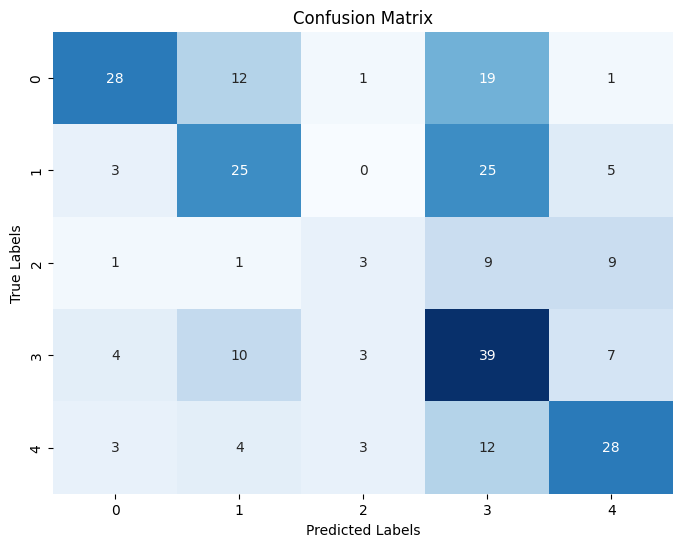

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [36]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.5 MB/s eta 0:00:00


In [37]:
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])


# Compile the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/100
13/13 [==============================] - 36s 544ms/step - loss: 1.5983 - accuracy: 0.2626 - val_loss: 1.5659 - val_accuracy: 0.4118
Epoch 2/100
13/13 [==============================] - 0s 32ms/step - loss: 1.5411 - accuracy: 0.4025 - val_loss: 1.5211 - val_accuracy: 0.4363
Epoch 3/100
13/13 [==============================] - 0s 31ms/step - loss: 1.4849 - accuracy: 0.4552 - val_loss: 1.4712 - val_accuracy: 0.4608
Epoch 4/100
13/13 [==============================] - 0s 26ms/step - loss: 1.4218 - accuracy: 0.4663 - val_loss: 1.4205 - val_accuracy: 0.4657
Epoch 5/100
13/13 [==============================] - 0s 33ms/step - loss: 1.3618 - accuracy: 0.4871 - val_loss: 1.3731 - val_accuracy: 0.4559
Epoch 6/100
13/13 [==============================] - 1s 44ms/step - loss: 1.2908 - accuracy: 0.4994 - val_loss: 1.3343 - val_accuracy: 0.4559
Epoch 7/100
13/13 [==============================] - 1s 45ms/step - loss: 1.2540 - accuracy: 0.5117 - val_loss: 1.3024 - val_accuracy: 0.4804
Epoc

In [38]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), padding='same'),
    Bidirectional(LSTM(64, return_sequences=True)),
    #Dropout(0.5),
    LSTM(32),
    #Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)  # Experiment with different learning rates
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=30, validation_split=0.2, callbacks=[early_stopping,reduce_lr], verbose=1)

test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/100
28/28 [==============================] - 14s 57ms/step - loss: 1.6063 - accuracy: 0.2528 - val_loss: 1.6037 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 2/100
28/28 [==============================] - 0s 7ms/step - loss: 1.6001 - accuracy: 0.3436 - val_loss: 1.5981 - val_accuracy: 0.3676 - lr: 1.0000e-04
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 1.5933 - accuracy: 0.4074 - val_loss: 1.5916 - val_accuracy: 0.3775 - lr: 1.0000e-04
Epoch 4/100
28/28 [==============================] - 0s 8ms/step - loss: 1.5846 - accuracy: 0.4233 - val_loss: 1.5831 - val_accuracy: 0.3873 - lr: 1.0000e-04
Epoch 5/100
28/28 [==============================] - 0s 8ms/step - loss: 1.5733 - accuracy: 0.4196 - val_loss: 1.5718 - val_accuracy: 0.3922 - lr: 1.0000e-04
Epoch 6/100
28/28 [==============================] - 0s 8ms/step - loss: 1.5583 - accuracy: 0.4123 - val_loss: 1.5568 - val_accuracy: 0.3971 - lr: 1.0000e-04
Epoch 7/100
28/28 [==============================]

### Trying Conventional models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test accuracy: 54.12%
              precision    recall  f1-score   support

       angry       0.63      0.54      0.58        61
       happy       0.49      0.60      0.54        58
     nervous       0.67      0.09      0.15        23
     neutral       0.49      0.49      0.49        63
         sad       0.57      0.74      0.64        50

    accuracy                           0.54       255
   macro avg       0.57      0.49      0.48       255
weighted avg       0.56      0.54      0.52       255



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)
print("Best parameters:", CV_rfc.best_params_)
print(f"Best cross-validation accuracy: {CV_rfc.best_score_ * 100:.2f}%")

Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 50}
Best cross-validation accuracy: 56.82%


In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM
model = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly'
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Test accuracy: 54.51%
              precision    recall  f1-score   support

           0       0.67      0.66      0.66        61
           1       0.52      0.60      0.56        58
           2       0.29      0.26      0.27        23
           3       0.49      0.43      0.46        63
           4       0.60      0.62      0.61        50

    accuracy                           0.55       255
   macro avg       0.51      0.51      0.51       255
weighted avg       0.54      0.55      0.54       255



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print(f"Best cross-validation accuracy: {grid.best_score_ * 100:.2f}%")

Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy: 58.78%


In [ ]:
import xgboost as xgb

# Initialize XGBoost
model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, learning_rate=0.1, n_estimators=100, max_depth=5, seed=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Test accuracy: 54.12%
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        61
           1       0.51      0.52      0.51        58
           2       0.27      0.17      0.21        23
           3       0.52      0.51      0.51        63
           4       0.61      0.74      0.67        50

    accuracy                           0.54       255
   macro avg       0.50      0.50      0.50       255
weighted avg       0.53      0.54      0.53       255



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(xgb.XGBClassifier(objective='multi:softmax', num_class=5, seed=42), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print(f"Best cross-validation accuracy: {grid.best_score_ * 100:.2f}%")

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation accuracy: 57.70%


###

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Attention
from tensorflow.keras.models import Model

def build_model(hp):
    inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    x = Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), return_sequences=True))(inputs)
    x = Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05))(x)
    # Attention layer
    query_value_attention_seq = Attention()([x, x])
    x = LSTM(64)(query_value_attention_seq)
    outputs = Dense(y_categorical.shape[1], activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

import keras_tuner as kt

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    directory='my_dir',
    project_name='keras_tuner_bilstm'
)

tuner.search(X_train_reshaped, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])


Trial 15 Complete [00h 00m 32s]
val_accuracy: 0.5490196347236633

Best val_accuracy So Far: 0.5539215803146362
Total elapsed time: 00h 05m 59s


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam


In [ ]:
def transformer_encoder(inputs):
    # Multi-head self-attention
    x = MultiHeadAttention(num_heads=2, key_dim=2)(inputs, inputs)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed-forward neural network
    ffnn = Dense(units=inputs.shape[-1], activation='relu')(x)
    ffnn_output = Dense(units=inputs.shape[-1])(ffnn)
    x = Dropout(0.1)(ffnn_output)
    encoder_output = LayerNormalization(epsilon=1e-6)(x + ffnn_output)
    return encoder_output

In [ ]:
input_shape = X_train_reshaped.shape[1:]  # Example: (sequence_length, feature_dim)
inputs = Input(shape=input_shape)
x = transformer_encoder(inputs)
x = GlobalAveragePooling1D()(x)
outputs = Dense(y_categorical.shape[1], activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1, 81)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 1, 81)                1389      ['input_2[0][0]',             
 iHeadAttention)                                                     'input_2[0][0]']             
                                                                                                  
 dropout_1 (Dropout)         (None, 1, 81)                0         ['multi_head_attention[0][0]']
                                                                                                  
 tf.__operators__.add (TFOp  (None, 1, 81)                0         ['dropout_1[0][0]',     

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the Transformer model
history = model.fit(X_train_reshaped, y_train,
                    epochs=50,
                    batch_size=34,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 2s 15ms/step - loss: 2.2000 - accuracy: 0.2405 - val_loss: 2.2146 - val_accuracy: 0.2157
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 1.8453 - accuracy: 0.3067 - val_loss: 1.9049 - val_accuracy: 0.2843
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.6379 - accuracy: 0.3693 - val_loss: 1.7338 - val_accuracy: 0.3088
Epoch 4/50
24/24 [==============================] - 0s 6ms/step - loss: 1.5178 - accuracy: 0.3791 - val_loss: 1.6342 - val_accuracy: 0.3529
Epoch 5/50
24/24 [==============================] - 0s 8ms/step - loss: 1.4382 - accuracy: 0.4074 - val_loss: 1.5722 - val_accuracy: 0.3627
Epoch 6/50
24/24 [==============================] - 0s 8ms/step - loss: 1.3815 - accuracy: 0.4270 - val_loss: 1.5294 - val_accuracy: 0.3873
Epoch 7/50
24/24 [==============================] - 0s 8ms/step - loss: 1.3415 - accuracy: 0.4442 - val_loss: 1.4952 - val_accuracy: 0.3922
Epoch 8/50
24/24 [=

In [ ]:
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = np.mean(y_pred == y_true)
print(f'Transformer Model Accuracy: {accuracy:.4f}')

# F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Transformer Model F1 Score: {f1:.4f}')

8/8 [==============================] - 0s 2ms/step
Transformer Model Accuracy: 0.5451
Transformer Model F1 Score: 0.5334


In [ ]:
x

#openSmile


In [ ]:
!pip install pyopensmile

ERROR: Could not find a version that satisfies the requirement pyopensmile (from versions: none)
ERROR: No matching distribution found for pyopensmile


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
26/26 [==============================] - 4s 40ms/step - loss: 1.5690 - accuracy: 0.3239 - val_loss: 1.3686 - val_accuracy: 0.4559
Epoch 2/15
26/26 [==============================] - 0s 12ms/step - loss: 1.3354 - accuracy: 0.4466 - val_loss: 1.2989 - val_accuracy: 0.4804
Epoch 3/15
26/26 [==============================] - 0s 13ms/step - loss: 1.2833 - accuracy: 0.4883 - val_loss: 1.2631 - val_accuracy: 0.4902
Epoch 4/15
26/26 [==============================] - 0s 13ms/step - loss: 1.1822 - accuracy: 0.5215 - val_loss: 1.2257 - val_accuracy: 0.5441
Epoch 5/15
26/26 [==============================] - 0s 12ms/step - loss: 1.1350 - accuracy: 0.5583 - val_loss: 1.2039 - val_accuracy: 0.5245
Epoch 6/15
26/26 [==============================] - 0s 14ms/step - loss: 1.0517 - accuracy: 0.5963 - val_loss: 1.1872 - val_accuracy: 0.5245
Epoch 7/15
26/26 [==============================] - 0s 13ms/step - loss: 1.0308 - accuracy: 0.6049 - val_loss: 1.2018 - val_accuracy: 0.5294
Epoch 8/15
26

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

8/8 [==============================] - 0s 4ms/step - loss: 1.2526 - accuracy: 0.5569
Test Accuracy: 55.69%


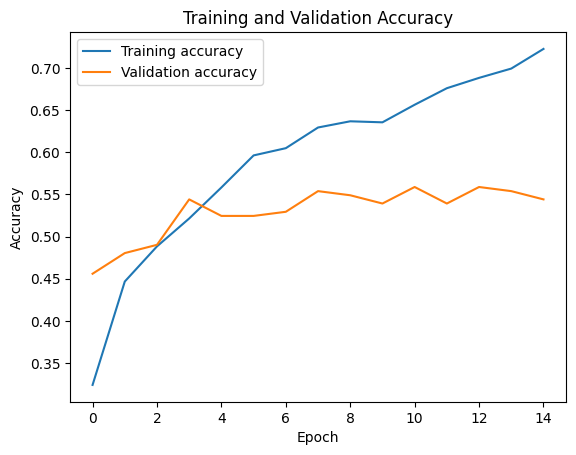

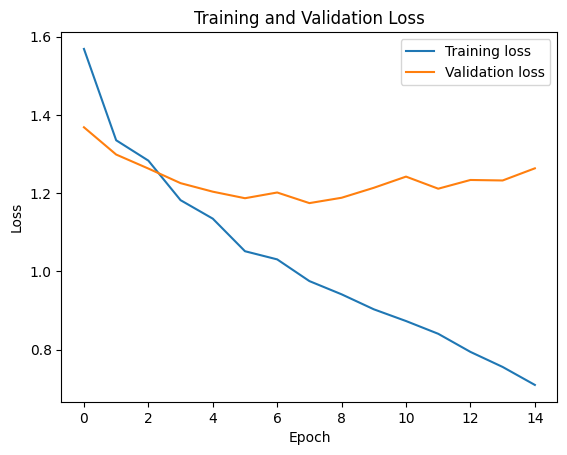

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(256),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# optimizer = Adam(learning_rate=0.0001)
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
26/26 [==============================] - 2s 17ms/step - loss: 2.2814 - accuracy: 0.1963 - val_loss: 1.5966 - val_accuracy: 0.2500
Epoch 2/50
26/26 [==============================] - 0s 9ms/step - loss: 2.0986 - accuracy: 0.2589 - val_loss: 1.5316 - val_accuracy: 0.3431
Epoch 3/50
26/26 [==============================] - 0s 8ms/step - loss: 1.9525 - accuracy: 0.2847 - val_loss: 1.4838 - val_accuracy: 0.3725
Epoch 4/50
26/26 [==============================] - 0s 8ms/step - loss: 1.9000 - accuracy: 0.2883 - val_loss: 1.4449 - val_accuracy: 0.3922
Epoch 5/50
26/26 [==============================] - 0s 9ms/step - loss: 1.8138 - accuracy: 0.3067 - val_loss: 1.4198 - val_accuracy: 0.4314
Epoch 6/50
26/26 [==============================] - 0s 7ms/step - loss: 1.7674 - accuracy: 0.3166 - val_loss: 1.3985 - val_accuracy: 0.4559
Epoch 7/50
26/26 [==============================] - 0s 8ms/step - loss: 1.7160 - accuracy: 0.3595 - val_loss: 1.3845 - val_accuracy: 0.4559
Epoch 8/50
26/26 [=

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

8/8 [==============================] - 0s 3ms/step - loss: 1.2187 - accuracy: 0.5451
Test Accuracy: 54.51%


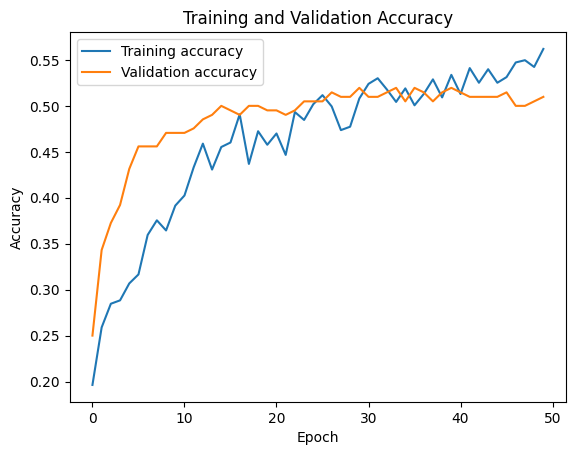

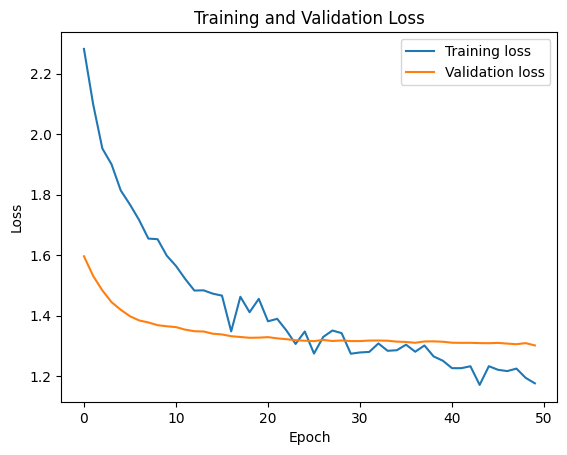

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model 3


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
26/26 [==============================] - 0s 10ms/step - loss: 1.1663 - accuracy: 0.5313 - val_loss: 1.3045 - val_accuracy: 0.5245
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 1.1737 - accuracy: 0.5448 - val_loss: 1.3066 - val_accuracy: 0.5245
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 1.1796 - accuracy: 0.5448 - val_loss: 1.3113 - val_accuracy: 0.5196
Epoch 4/100
26/26 [==============================] - 0s 9ms/step - loss: 1.1555 - accuracy: 0.5620 - val_loss: 1.3144 - val_accuracy: 0.5196
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 1.1570 - accuracy: 0.5644 - val_loss: 1.3114 - val_accuracy: 0.5147
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 1.1942 - accuracy: 0.5509 - val_loss: 1.3115 - val_accuracy: 0.5147
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 1.1728 - accuracy: 0.5448 - val_loss: 1.3150 - val_accuracy: 0.5147
Epoch 8/100


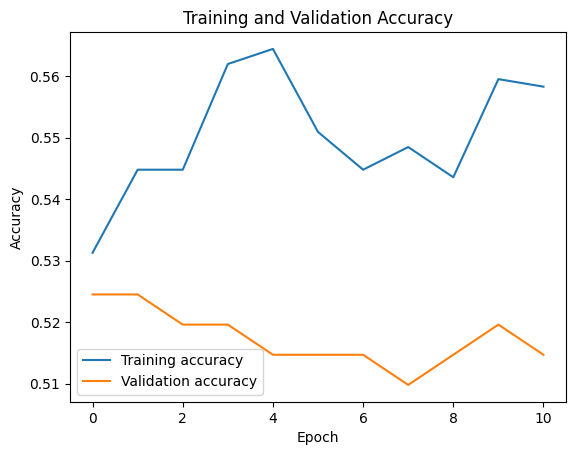

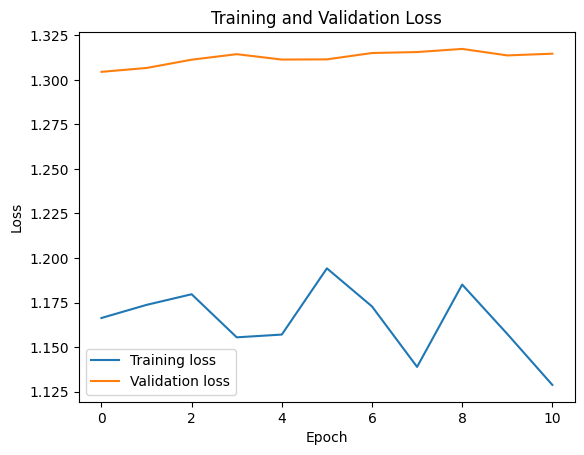

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

8/8 [==============================] - 0s 3ms/step - loss: 1.2180 - accuracy: 0.5490
Test Accuracy: 54.90%


##LSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Defining the model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compiling the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# Training the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/100
26/26 [==============================] - 3s 48ms/step - loss: 1.5780 - accuracy: 0.2540 - val_loss: 1.5472 - val_accuracy: 0.2647
Epoch 2/100
26/26 [==============================] - 1s 22ms/step - loss: 1.5531 - accuracy: 0.2785 - val_loss: 1.5352 - val_accuracy: 0.3137
Epoch 3/100
26/26 [==============================] - 1s 23ms/step - loss: 1.5387 - accuracy: 0.3006 - val_loss: 1.5286 - val_accuracy: 0.2843
Epoch 4/100
26/26 [==============================] - 1s 25ms/step - loss: 1.5294 - accuracy: 0.3239 - val_loss: 1.5272 - val_accuracy: 0.2941
Epoch 5/100
26/26 [==============================] - 1s 29ms/step - loss: 1.5190 - accuracy: 0.3239 - val_loss: 1.5047 - val_accuracy: 0.3382
Epoch 6/100
26/26 [==============================] - 1s 28ms/step - loss: 1.5070 - accuracy: 0.3399 - val_loss: 1.5051 - val_accuracy: 0.3235
Epoch 7/100
26/26 [==============================] - 1s 30ms/step - loss: 1.4921 - accuracy: 0.3497 - val_loss: 1.4942 - val_accuracy: 0.3431
Epoch 

In [48]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming 'images', 'labels', and necessary imports are already defined

# Load and preprocess the data
# Assuming 'labels' are the raw target labels and 'features' are the corresponding input features from your dataset
labels_encoded = LabelEncoder().fit_transform(y)  # Converts labels to integers
labels_categorical = to_categorical(labels_encoded, num_classes=5)  # One-hot encode labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels_categorical, test_size=0.2, random_state=42)

# Reshape the input data for a dense network (flattening the feature arrays)

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
time_steps = 9
features_per_step = X_train.shape[1] // time_steps
X_train_reshaped = X_train.reshape(X_train.shape[0], time_steps, features_per_step)
# Define the neural network model
model = Sequential([
    # Add a Bidirectional LSTM layer
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[0], X_train.shape[1])),
    Dropout(0.5),
    # Stacking another LSTM layer after the first one
    LSTM(32),
    Dropout(0.5),
    # Output layer with the number of output classes
    Dense(5, activation='softmax')  # Adjust the number of classes based on your target
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Optionally, print a summary of the model
model.summary()


Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 1019, 81), found shape=(None, 9, 9)


In [46]:
print(X_train.shape)


(1019, 81)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Model definition
model = Sequential([
    Flatten(input_shape=(1, 81)),  # Flatten the input
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Assuming 6 distinct emotion labels
])

# Model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    X_train_reshaped,  # Ensure X_train_reshaped is appropriately shaped
    y_train,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Model evaluation
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test, verbose=2)  # Ensure X_test_reshaped is appropriately shaped
print(f"Test Accuracy: {test_acc*100:.2f}%")


Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-40-f3f0508d51e6>", line 20, in <cell line: 20>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [50,6] and labels shape [250]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_53626]

## MelSpectogram

In [ ]:
import pandas as pd
import librosa
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

def extract_melspectrogram(audio_path, sr=22050, n_mels=128, figsize=(128, 128)):
  """Extracts melspectrogram from an audio file.

  Args:
      audio_path: Path to the audio file.
      sr: Sampling rate (default: 22050).
      n_mels: Number of mel filters (default: 128).
      figsize: Desired output image size (default: (128, 128)).

  Returns:
      A NumPy array representing the melspectrogram image.
  """
  y, _ = librosa.load(audio_path, sr=sr)
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
  # Normalize mel spectrogram to [0, 1] range
  mel_spectrogram = librosa.power_to_db(mel_spectrogram).astype("float32") / 80
  return librosa.feature.inverse.mel_to_image(mel_spectrogram, figsize=figsize)

def create_melspectrogram_dataset(df, audio_path_col="Audio_Uttrance_Path", target_col="New_Category", image_size=(128, 128)):
  """Creates a dataset of mel spectrograms and labels from a DataFrame.

  Args:
      df: Pandas DataFrame containing audio data.
      audio_path_col: Column name containing audio file paths (default: "Audio_Uttrance_Path").
      target_col: Column name containing class labels (default: "New_Category").
      image_size: Desired image size (default: (128, 128)).

  Returns:
      A tuple containing training and validation data generators.
  """
  X = []
  y = []
  for index, row in tqdm(df.iterrows(), total=len(df), desc="Extracting features"):
    audio_path = row[audio_path_col]
    mel_spectrogram = extract_melspectrogram(audio_path, figsize=image_size)
    X.append(mel_spectrogram)
    y.append(row[target_col])

  X = np.array(X)
  y = np.array(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
  val_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
  val_generator = val_datagen.flow(X_test, y_test, batch_size=32)

  return train_generator, val_generator

def build_model(input_shape):
  """Builds a CNN model for audio classification using mel spectrograms.

  Args:
      input_shape: Shape of the input image (e.g., (128, 128, 1)).

  Returns:
      A compiled Keras model.
  """
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation="relu"))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(len(class_labels), activation="softmax"))

  model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

  return model


In [ ]:
# Define paths and hyperparameters
audio_path_col = "Audio_Uttrance_Path"
target_col = "New_Category"
image_size = (128, 128)
epochs = 50  # Adjust this as needed

# Create mel spectrogram dataset
train_generator, val_generator = create_melspectrogram_dataset(df, audio_path_col, target_col, image_size)

# Get the number of unique emotion categories
num_classes = len(set(df[target_col]))

# Build the CNN model
input_shape = train_generator.image_shape
model = build_model(input_shape)
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=3)

# Train the model
model_history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[early_stopping])

# Evaluate the model on the test set (replace with actual test data if available)
test_generator = create_melspectrogram_dataset(df.iloc[int(0.8*len(df)):], audio_path_col, target_col, image_size)  # Assuming 80% for training, 20% for testing
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Extracting features:   0%|          | 0/10037 [00:00<?, ?it/s]Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x78eeea3575b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 
Extracting features:   0%|          | 0/10037 [00:21<?, ?it/s]


AttributeError: module 'librosa.feature.inverse' has no attribute 'mel_to_image'

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_melspectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    fig, ax = plt.subplots(figsize=(5, 3))
    img = librosa.display.specshow(mel_spec_db, ax=ax, x_axis='time', y_axis='mel')
    fig.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

# Loop through audio files and extract mel-spectrograms
for i, audio_path in enumerate(df['Audio_Uttrance_Path']):
    save_path = f'melspecs/melspec_{i}.png'
    extract_melspectrogram(audio_path, save_path)